In [2]:
import numpy as np
import pandas as pd
from math import sqrt
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [4]:
df = pd.read_csv(r'..\data\FuelConsumptionCo2.csv')
print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [ ]:
engines = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

print(engines.head(), co2.head(), sep='\n')

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


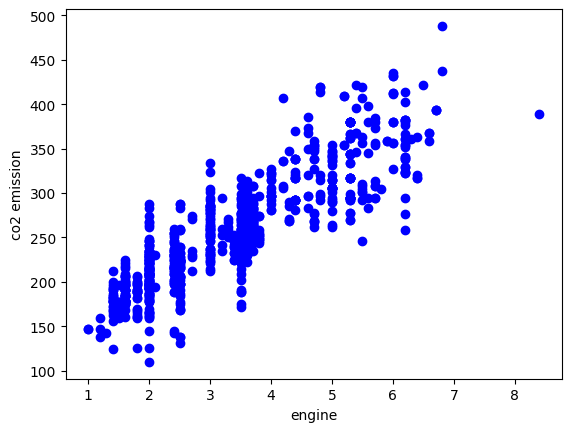

In [6]:
train_engines, test_engines, train_co2, test_co2 = train_test_split(engines, co2, test_size=0.2, random_state=42)

plt.scatter(train_engines, train_co2, color='blue')
plt.xlabel("engine")
plt.ylabel("co2 emission")
plt.show()

In [7]:
model = linear_model.LinearRegression()
model.fit(train_engines, train_co2)

LinearRegression()

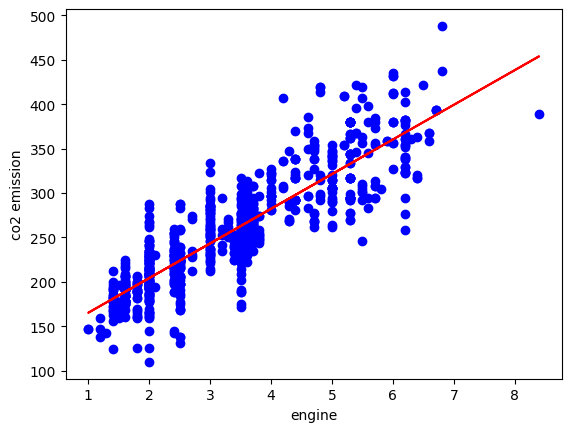

In [ ]:
plt.scatter(train_engines, train_co2, color='blue')
plt.plot(train_engines, model.coef_[0][0]*train_engines + model.intercept_[0], '-r')
plt.xlabel("engine")
plt.ylabel("co2 emission")
plt.show()

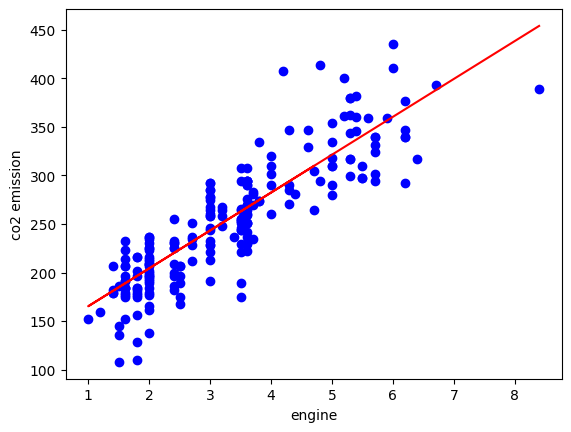

In [20]:
co2_predictions = model.predict(test_engines)

plt.scatter(test_engines, test_co2, color='blue')
plt.plot(test_engines, model.coef_[0][0]*test_engines + model.intercept_[0], '-r')
plt.xlabel("engine")
plt.ylabel("co2 emission")
plt.show()

In [28]:
print("Sum of Squared Errors (SSE): %2.f " % np.sum((co2_predictions - test_co2)**2, axis=0).item())
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(test_co2, co2_predictions))
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(test_co2, co2_predictions))
print("Root Mean Squared Error (RMSE): %.2f " % sqrt(mean_squared_error(test_co2, co2_predictions)))
print("R2-score: %.2f" % r2_score(test_co2 , co2_predictions))

Sum of Squared Errors (SSE): 210991 
Mean Squared Error (MSE): 985.94
Mean Absolute Error (MAE): 24.10
Root Mean Squared Error (RMSE): 31.40 
R2-score: 0.76
